In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

## Reading the Data

In [2]:
df=pd.read_csv("D:\Veri Bilimi Eğitimi\Test Dosyaları\StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### *Result: There is no missing values in the data.*

---

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## Adding a new column as a target variable.

In [7]:
df["Overall_Score"]=round((df["math score"]+df["reading score"]+df["writing score"])/3,2)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.08900,15.163080,0.0,57.00,66.00,77.00,100.0
reading score,1000.0,69.16900,14.600192,17.0,59.00,70.00,79.00,100.0
writing score,1000.0,68.05400,15.195657,10.0,57.75,69.00,79.00,100.0
Overall_Score,1000.0,67.77058,14.257311,9.0,58.33,68.33,77.67,100.0


## Renaming columns

In [9]:
df.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [10]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Overall_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


## Basic EDA operations

In [11]:
df.Gender.value_counts()

female    518
male      482
Name: Gender, dtype: int64

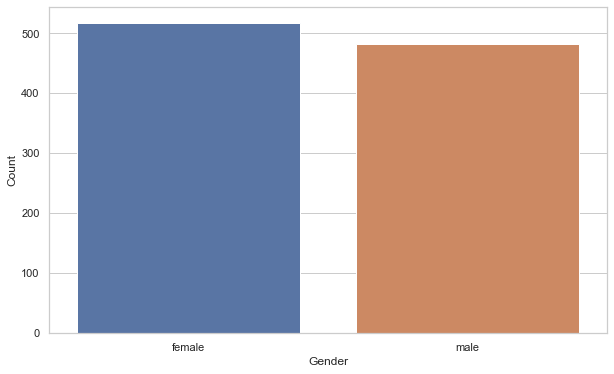

In [12]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

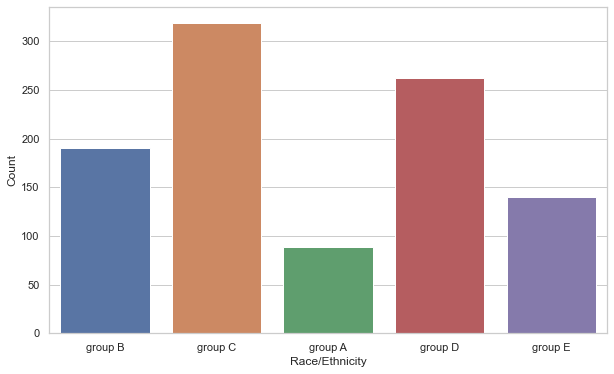

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x="Race/Ethnicity",data=df)
plt.ylabel('Count')

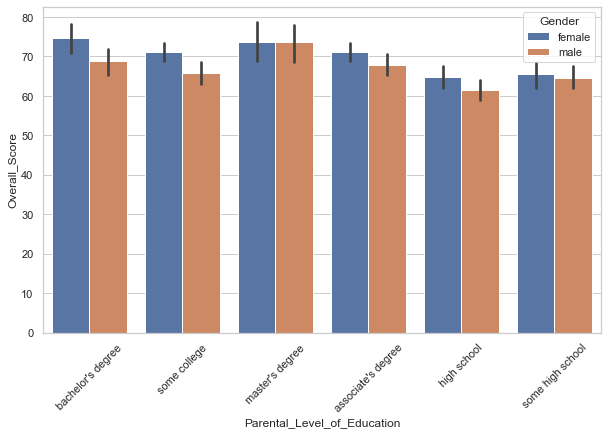

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Parental_Level_of_Education", y = "Overall_Score", hue = "Gender", data = df)
plt.xticks(rotation=45)
plt.show()



### *Result: Parents that have Master's or Bachelor's Degree have more successful children.*
### *In general, female students are more successful than male students.*

---

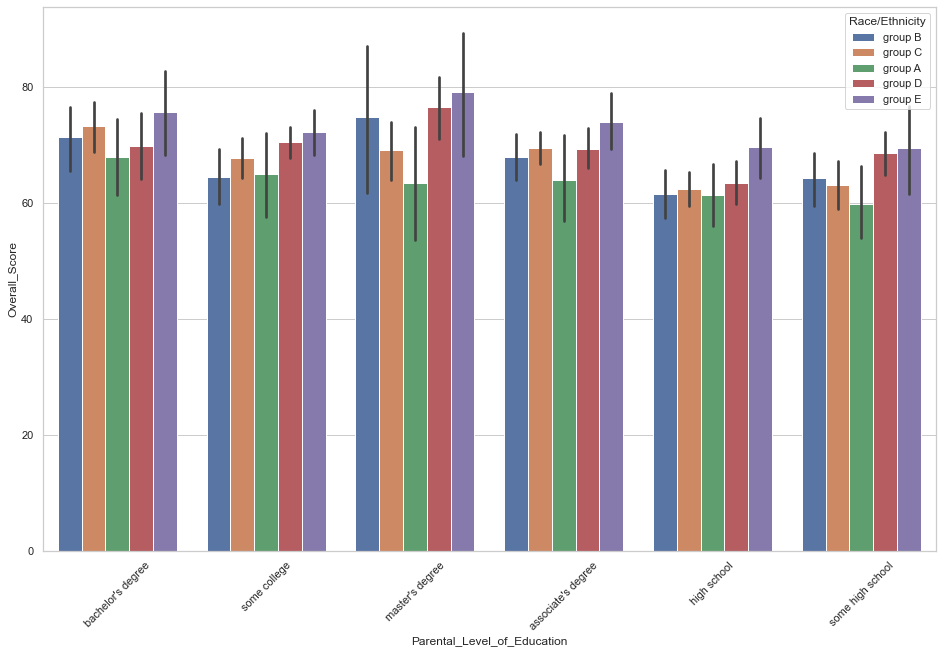

In [15]:
plt.figure(figsize=(16,10))
sns.barplot(x = "Parental_Level_of_Education", y = "Overall_Score", hue = "Race/Ethnicity", data = df)
plt.xticks(rotation=45)
plt.show()

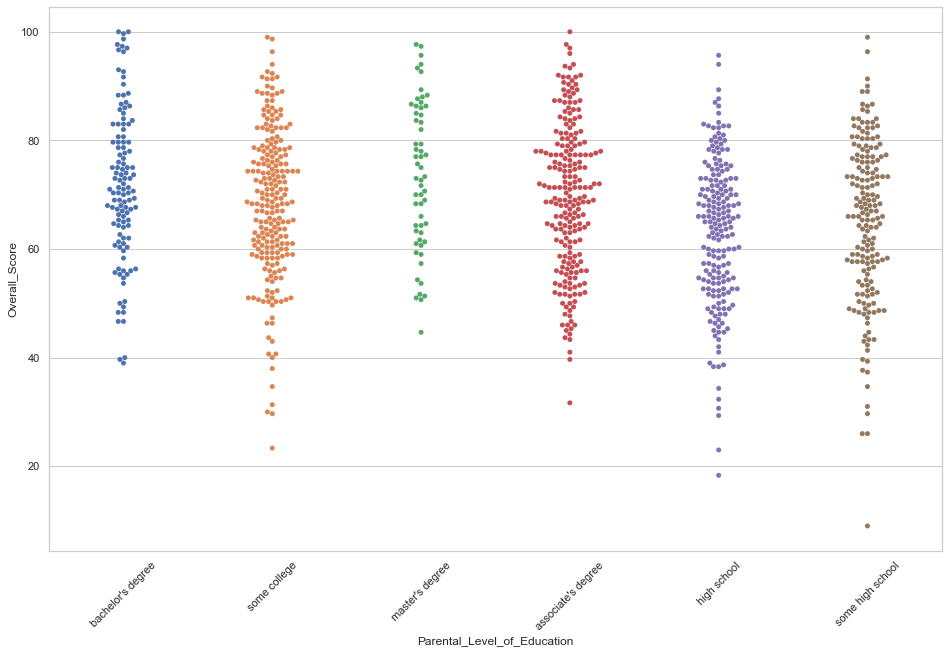

In [16]:
plt.figure(figsize=(16,10))
sns.swarmplot(x="Parental_Level_of_Education", y="Overall_Score", data=df)
plt.xticks(rotation=45)
plt.show()

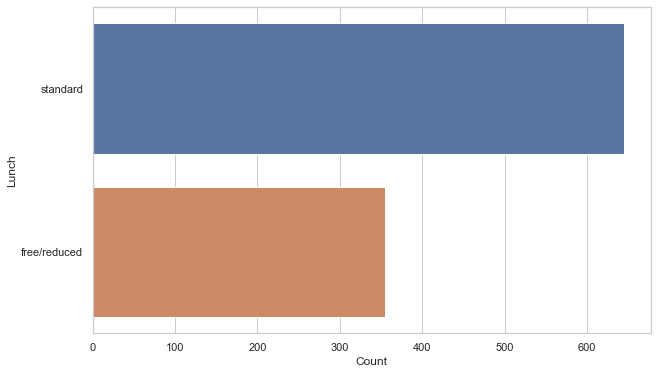

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y='Lunch',data=df)
plt.xlabel("Count")
plt.ylabel("Lunch")
plt.show()

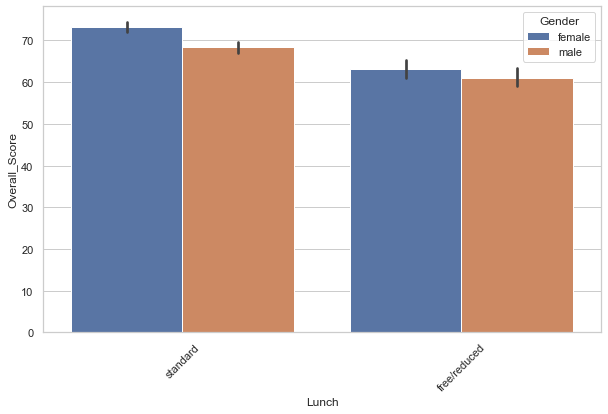

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Lunch", y = "Overall_Score", hue = "Gender", data = df)
plt.xticks(rotation=45)
plt.show()

### *Result: Students that have standard lunch are more successful.*

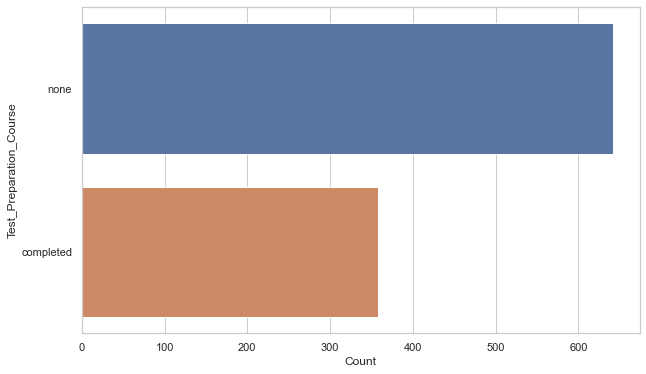

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y='Test_Preparation_Course',data=df)
plt.xlabel("Count")
plt.ylabel("Test_Preparation_Course")
plt.show()

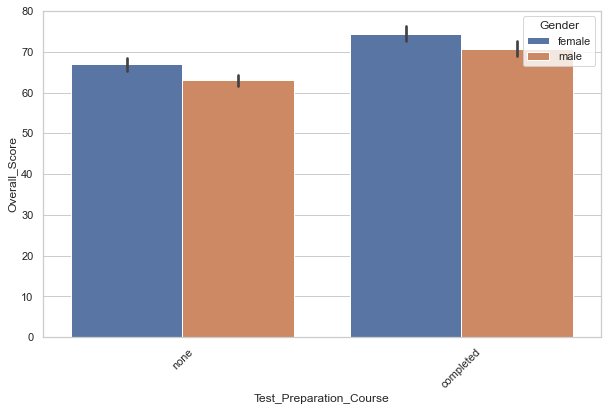

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Test_Preparation_Course", y = "Overall_Score", hue = "Gender", data = df)
plt.xticks(rotation=45)
plt.show()

### *Result: Students who have prepared before an exam are more successful.*

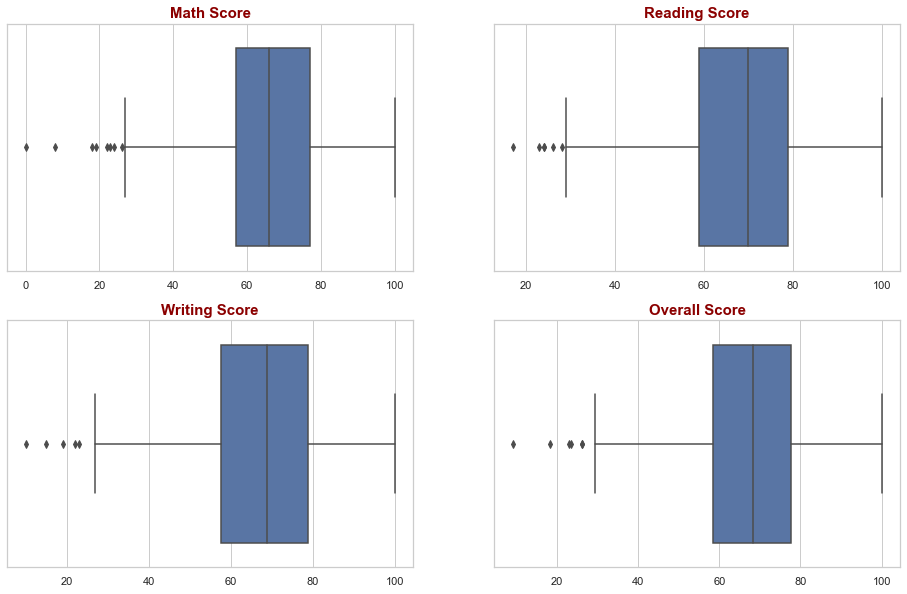

In [21]:
plt.figure(figsize=(16,10))
title_font = {'color': 'darkred','weight': 'bold','size': 15 }
plt.subplot(221)
sns.boxplot(df.Math_Score)
plt.title("Math Score", fontdict=title_font)
plt.xlabel("")
plt.subplot(222)
sns.boxplot(df.Reading_Score)
plt.title("Reading Score", fontdict=title_font)
plt.xlabel("")
plt.subplot(223)
sns.boxplot(df.Writing_Score)
plt.title("Writing Score", fontdict=title_font)
plt.xlabel("")
plt.subplot(224)
sns.boxplot(df.Overall_Score)
plt.title("Overall Score", fontdict=title_font)
plt.xlabel("")
plt.show()

## Converting the columns with dtype 'object' into 'int64'

In [22]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Overall_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [23]:
df=pd.get_dummies(data=df, columns=["Gender","Race/Ethnicity","Lunch","Test_Preparation_Course"], drop_first=True)

In [24]:
df["Parental_Level_of_Education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [25]:
change_list={"some high school":0, "high school":1, "some college":2,
             "associate's degree":3, "bachelor's degree":4, "master's degree":5}

In [26]:
df.Parental_Level_of_Education.replace(change_list, inplace=True)

In [27]:
df.head()

,Parental_Level_of_Education,Math_Score,Reading_Score,Writing_Score,Overall_Score,Gender_male,Race/Ethnicity_group B,Race/Ethnicity_group C,Race/Ethnicity_group D,Race/Ethnicity_group E,Lunch_standard,Test_Preparation_Course_none
0,4,72,72,74,72.67,0,1,0,0,0,1,1
1,2,69,90,88,82.33,0,0,1,0,0,1,0
2,5,90,95,93,92.67,0,1,0,0,0,1,1
3,3,47,57,44,49.33,1,0,0,0,0,0,1
4,2,76,78,75,76.33,1,0,1,0,0,1,1


## Correlation Matrix

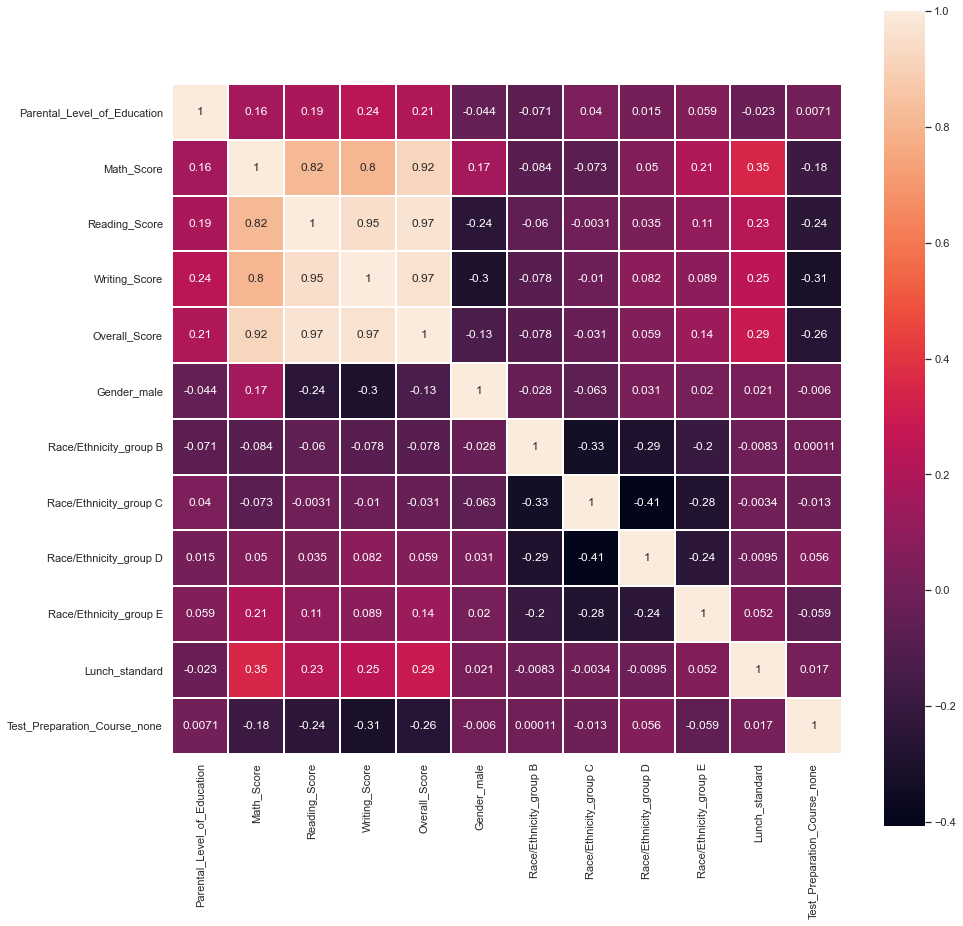

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=1)
plt.show()

### *Result: There are only correlations between exam scores.*

<Figure size 1152x720 with 0 Axes>

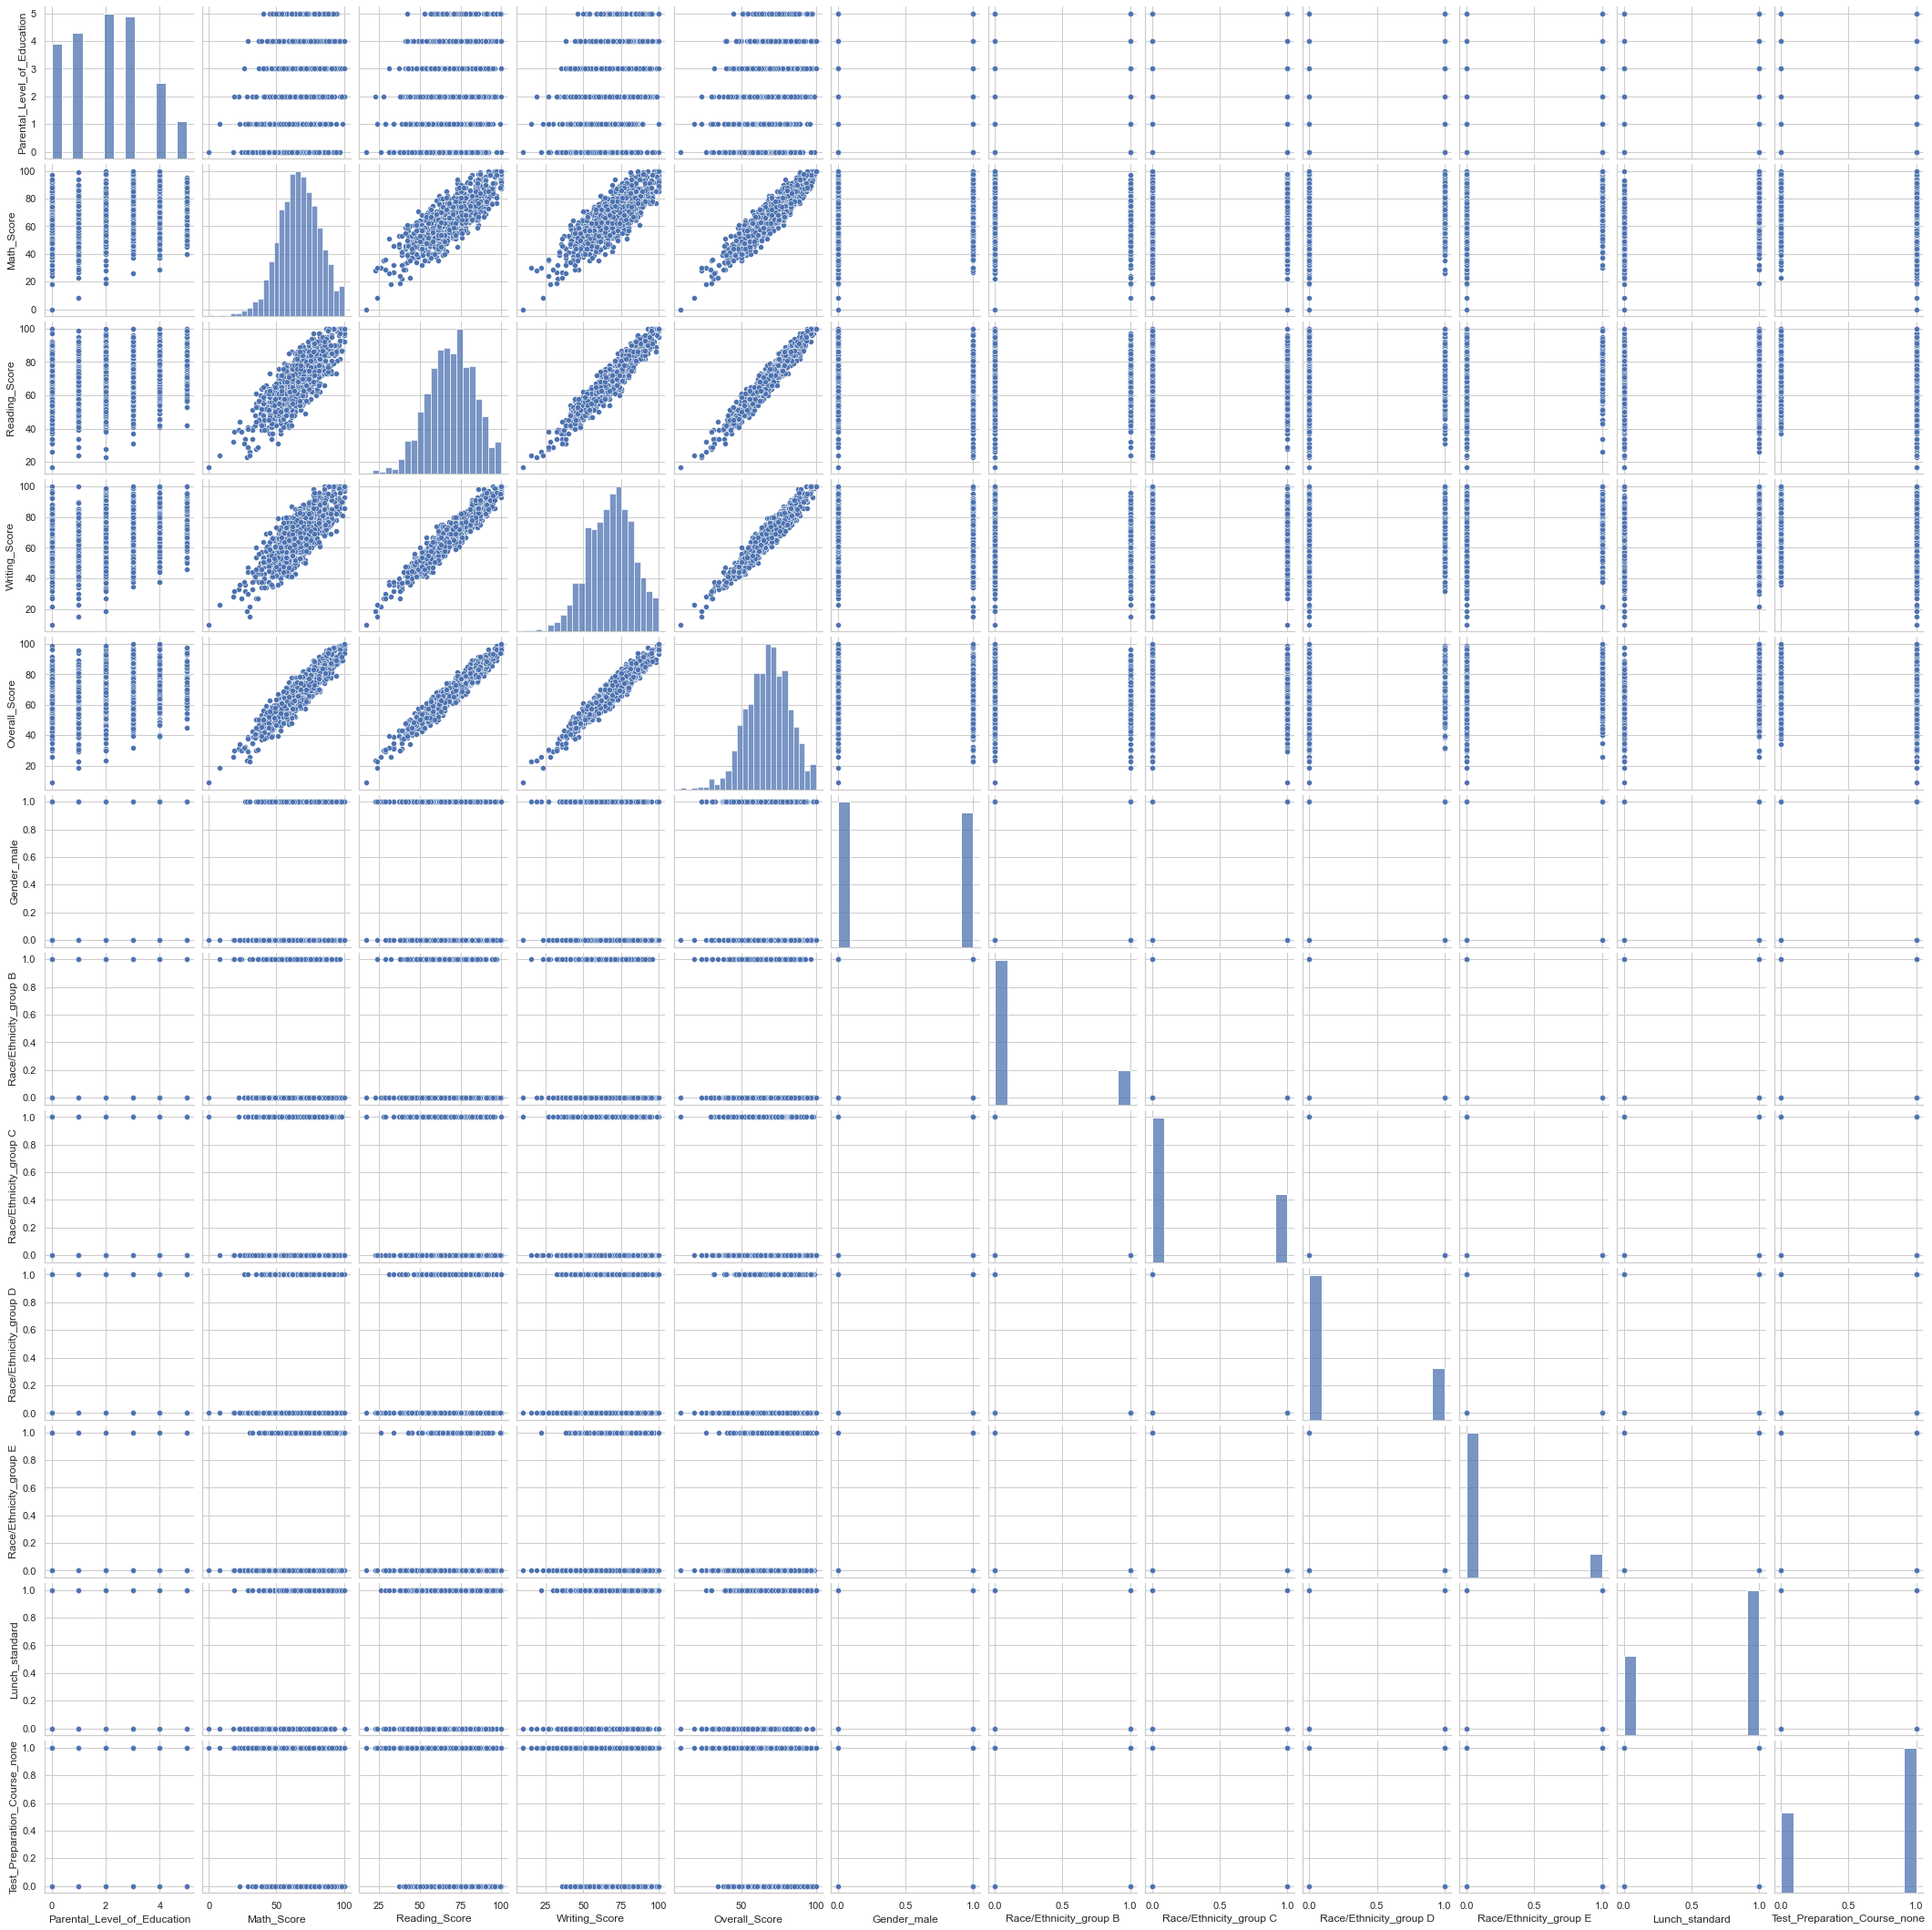

In [29]:
plt.figure(figsize=(16,10))
sns.pairplot(df)
plt.show()

## Linear Regression

In [30]:
df.head()

,Parental_Level_of_Education,Math_Score,Reading_Score,Writing_Score,Overall_Score,Gender_male,Race/Ethnicity_group B,Race/Ethnicity_group C,Race/Ethnicity_group D,Race/Ethnicity_group E,Lunch_standard,Test_Preparation_Course_none
0,4,72,72,74,72.67,0,1,0,0,0,1,1
1,2,69,90,88,82.33,0,0,1,0,0,1,0
2,5,90,95,93,92.67,0,1,0,0,0,1,1
3,3,47,57,44,49.33,1,0,0,0,0,0,1
4,2,76,78,75,76.33,1,0,1,0,0,1,1


In [31]:
# Y is the target variable
Y = df["Overall_Score"]

# X is the feature set
X = df[["Parental_Level_of_Education","Gender_male", "Race/Ethnicity_group B", "Race/Ethnicity_group C", 
        "Race/Ethnicity_group D", "Race/Ethnicity_group E", "Lunch_standard", "Test_Preparation_Course_none"]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 800
The number of observations in test set is 200


In [33]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overall_Score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     29.52
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.76e-40
Time:                        19:30:30   Log-Likelihood:                -3153.6
No. Observations:                 800   AIC:                             6325.
Df Residuals:                     791   BIC:                             6367.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           61.7100      1.852     33.315      0.000      58.074      65.346
Parental_Level_of_Education      1.7894      0.302      5.935      0.000       1.198       2.381
Gender_male                     -4.1061      0.893     -4.596      0.000      -5.860      -2.353
Race/Ethnicity_group B           1.4082      1.782      0.790      0.430      -2.091       4.907
Race/Ethnicity_group C           2.0301      1.680      1.209      0.227      -1.267       5.327
Race/Ethnicity_group D           4.9818      1.702      2.928      0.004       1.642       8.322
Race/Ethnicity_group E           7.0561      1.902      3.711      0.000       3.323      10.789
Lunch_standard                   8.7550      0.937      9.339      0.000       6.915      10.595
Test_Preparation_Course_none    -7.6318      0.928     -8.226      0.000      -9.453      -5.811
==============================================================================
Omnibus:                        6.664   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.779
Skew:                          -0.222   Prob(JB):                       0.0337
Kurtosis:                       2.923   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *Result: Adjusted R-squared value is only 0.222, so the model is performing poorly. P-values of Race/Ethnicity Group B and C are greater than 0, so they might not add fruitful information to the model and can be removed.*

---

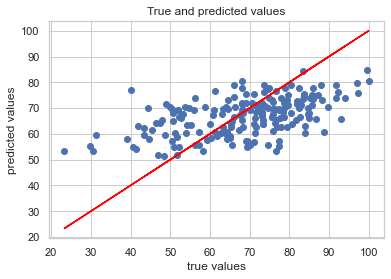

Mean absolute error of the prediction is: 10.062086101970666
Mean squared error of the prediction is: 152.78909787364321
Root mean squared error of the prediction is: 12.360788723768529
Mean absolute percentage error of the prediction is: 16.422931251541474


In [34]:
# Making predictions now
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("True and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## Feature Engineering and Model Improvement

In [35]:
Y = df["Overall_Score"]

# Creating a new column
df["Education_Lunch"]=df.Parental_Level_of_Education * df.Lunch_standard

# Adding new column to the feature set and removing 2 meaningless ones
X = df[["Parental_Level_of_Education","Gender_male", "Race/Ethnicity_group D", "Race/Ethnicity_group E",
        "Lunch_standard", "Test_Preparation_Course_none", "Education_Lunch"]]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [37]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overall_Score   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     34.05
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.43e-41
Time:                        19:30:31   Log-Likelihood:                -3152.8
No. Observations:                 800   AIC:                             6322.
Df Residuals:                     792   BIC:                             6359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           61.7158      1.530     40.329      0.000      58.712      64.720
Parental_Level_of_Education      2.4896      0.498      5.003      0.000       1.513       3.466
Gender_male                     -4.2952      0.891     -4.821      0.000      -6.044      -2.546
Race/Ethnicity_group D           3.4618      1.031      3.358      0.001       1.438       5.485
Race/Ethnicity_group E           5.6103      1.332      4.212      0.000       2.996       8.225
Lunch_standard                  11.0266      1.612      6.841      0.000       7.863      14.190
Test_Preparation_Course_none    -7.5290      0.927     -8.118      0.000      -9.350      -5.708
Education_Lunch                 -1.0719      0.625     -1.715      0.087      -2.299       0.155
==============================================================================
Omnibus:                        6.600   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.725
Skew:                          -0.218   Prob(JB):                       0.0347
Kurtosis:                       2.893   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

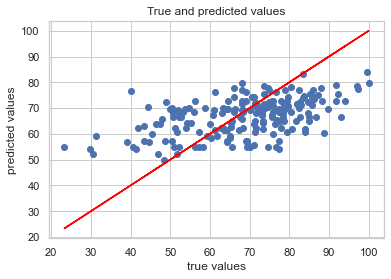

Mean absolute error of the prediction is: 10.187372595471478
Mean squared error of the prediction is: 155.0068295812771
Root mean squared error of the prediction is: 12.450173877551956
Mean absolute percentage error of the prediction is: 16.54882713034586


In [38]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("True and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### *Result: There isn't many columns we can play and what we have is mostly consist binary values. That's why there isn't much improvement in the model. It increased from 0.222 to 0.225*

---

## Regularization of the Model by using Ridge, Lasso and ElasticNet

In [39]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge() 
ridgeregr.fit(X_train, y_train)

y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.23129000739429462
-----Test set statistics-----
R-squared of the model in test set is: 0.2512459372195225
Mean absolute error of the prediction is: 10.18148779430979
Mean squared error of the prediction is: 154.87873767956006
Root mean squared error of the prediction is: 12.445028633135404
Mean absolute percentage error of the prediction is: 16.548365466799154


In [40]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=0.01) 
lassoregr.fit(X_train, y_train)

y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.23127959976995727
-----Test set statistics-----
R-squared of the model in test set is: 0.25143583044703954
Mean absolute error of the prediction is: 10.181047363749526
Mean squared error of the prediction is: 154.83945852925734
Root mean squared error of the prediction is: 12.443450427002043
Mean absolute percentage error of the prediction is: 16.5491352703841


In [41]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=0.01, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.23093327855654533
-----Test set statistics-----
R-squared of the model in test set is: 0.2530695474805412
Mean absolute error of the prediction is: 10.165407875024387
Mean squared error of the prediction is: 154.5015264305189
Root mean squared error of the prediction is: 12.42986429654479
Mean absolute percentage error of the prediction is: 16.552418272741228


### *Result: Even with the regularization methods, linear regression does not provide a good model. Maximum R-squared value we could reach is 0.253*

---

## Regression with Decision Tree and Random Forest

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [43]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

print("RMSE Value of the Decision Tree : {:.2f}".format(rmse_ka))

RMSE Value of the Decision Tree : 12.88


In [44]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=25, random_state=123)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=123)

In [45]:
from sklearn.metrics import mean_squared_error as MSE
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)

print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 13.76


### *Result: Random Forest (RMSE=13.76) is performing worse than Decision Tree (RMSE=12.88).*

---

## Importance Level of Features

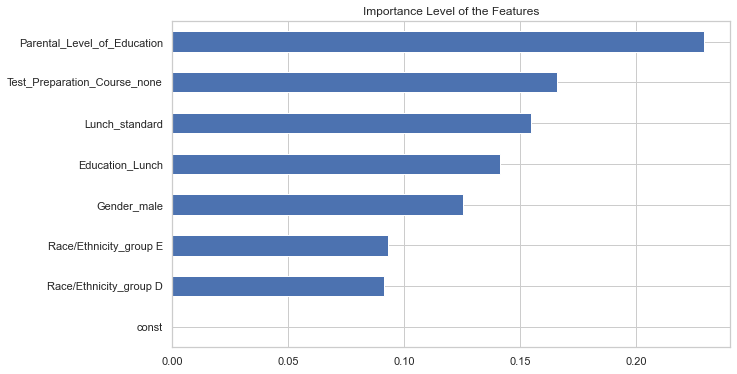

In [46]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

plt.figure(figsize=(10,6))
importance_level_sorted.plot(kind='barh')
plt.title('Importance Level of the Features')
plt.show()

### *Result: The most important feature by-far is 'Parental_Level_of_Education'.*

---

## Regression with Support Vector Machines (SVM)

In [47]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear', C=1, epsilon=0.1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 12.46


### *Result: SVM (RMSE=12.46) performs better than Decision Tree (RMSE=12.88), however still there isn't any improvement in comparison to Linear Regression (RMSE=12.36).*

---

## Regression with XGBOOST

In [48]:
import xgboost as xgb

In [49]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [50]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 14.243783


In [51]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [52]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 14.514158


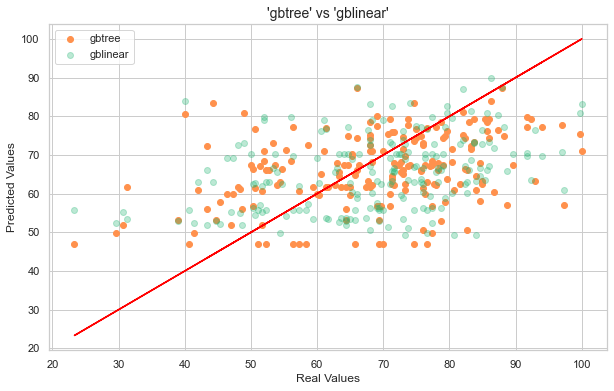

In [54]:
plt.figure(figsize=(10,6))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

## Cross Validation with XGBoost

In [56]:
student_grades_dmatrix = xgb.DMatrix(data=X, label=Y)
params = {"objective":"reg:squarederror", "max_depth":4}
student_grades_cv = xgb.cv(dtrain=student_grades_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(student_grades_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
11,12.106171,0.126529,12.861349,0.355138
10,12.179057,0.127015,12.868388,0.368071
9,12.299638,0.128560,12.949846,0.366569
8,12.512213,0.125942,13.089598,0.373917
7,12.886636,0.125901,13.408711,0.357376


### *Result: The RMSE value goes down to 12.86 at the 11th iteration.*

---


## Regularization with XGBoost

In [65]:
student_grades_dmatrix = xgb.DMatrix(data=X, label=Y)
l1_params = np.arange(0.1, 1, 0.05)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=student_grades_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [66]:
print("Best L1 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["L1", "RMSE"])
display(best_values.sort_values("RMSE").head())

Best L1 values:


,L1,RMSE
3,0.25,12.709250
2,0.20,12.709262
1,0.15,12.709651
0,0.10,12.709667
17,0.95,12.709955


### *Result: When the L1-value is set to 0.25, RMSE value decreases to 12.70*

---

## Hyperparameter Tuning

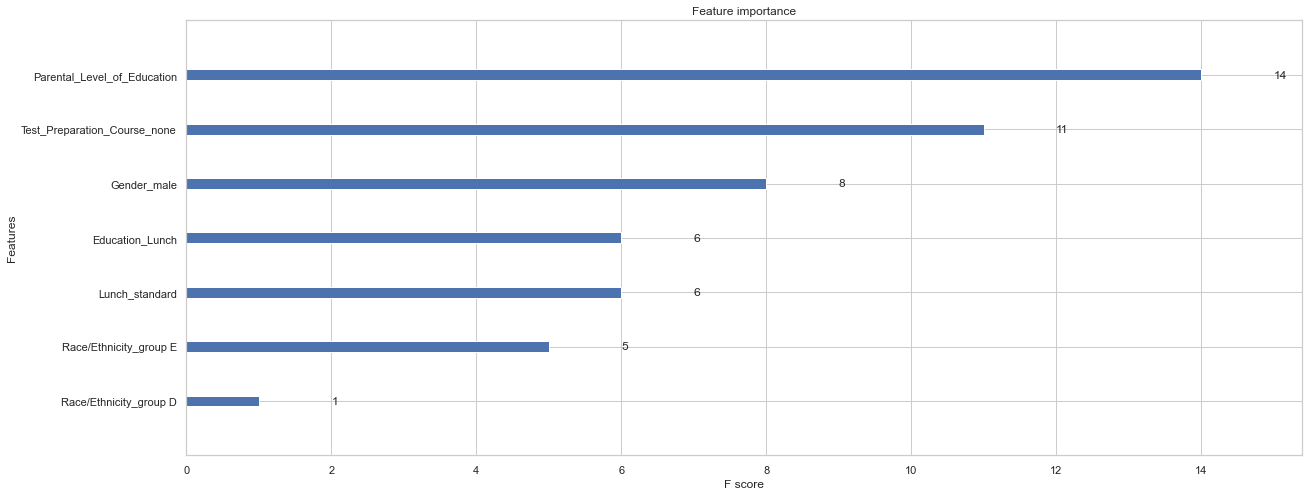

In [67]:
student_grades_dmatrix = xgb.DMatrix(data=X, label=Y)

best_parameters = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3
                      }

student_grades_model = xgb.train(params=best_parameters, dtrain=student_grades_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(student_grades_model)
ax.figure.set_size_inches(20,8)
plt.show()

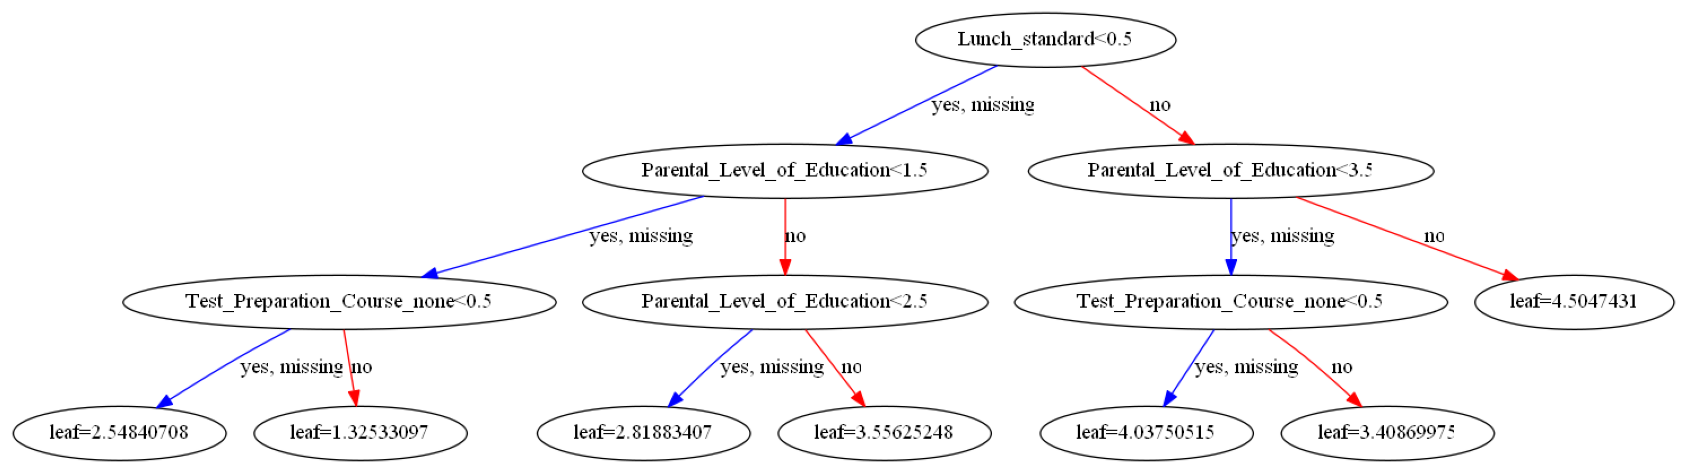

In [74]:
ax1 = xgb.plot_tree(student_grades_model, num_trees=5)
ax1.figure.set_size_inches(30,30)
plt.show()


## Boosting with Light GBM

In [78]:
import lightgbm as lgb

In [80]:
d_train = lgb.Dataset(X_train, label=y_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [81]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 13.093520


### *Result: Light GBM (RMSE=13.09) also performs worse than XGBoost or Lineer Regression.*

---

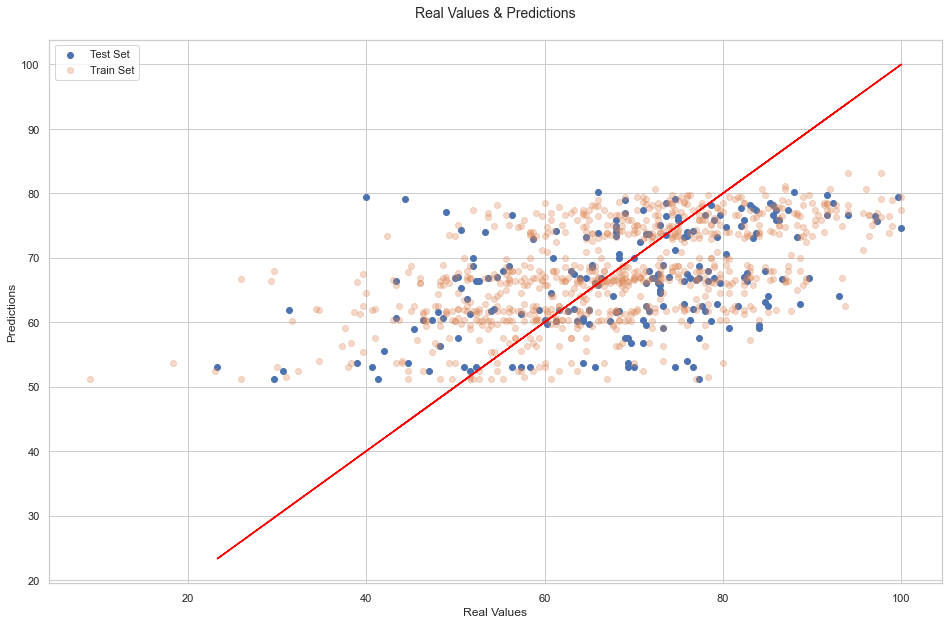

In [83]:
plt.figure(figsize=(16,10))
plt.title('Real Values & Predictions\n', size = 14)
ax1 = plt.scatter(y_test, y_predict)
ax2 = plt.scatter(y_train, y_predict_train,alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Set', 'Train Set'))
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()